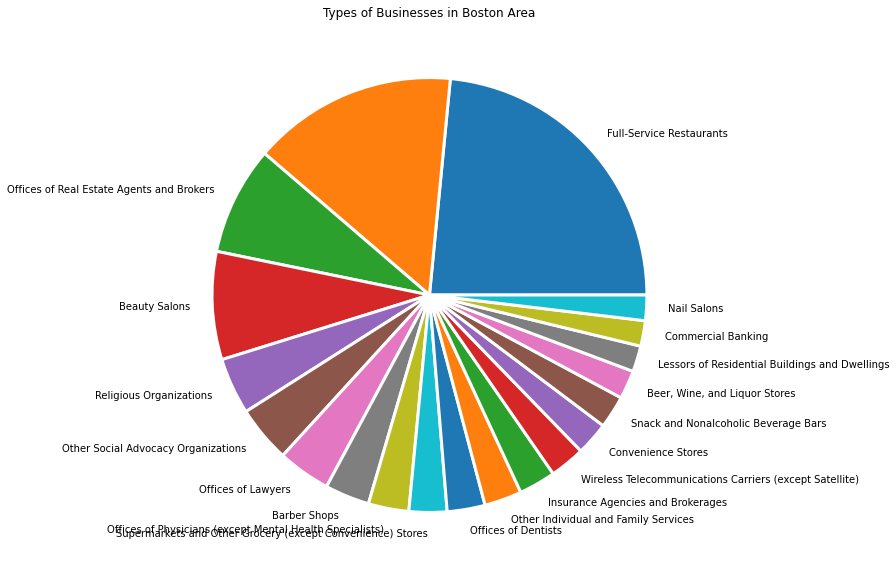

In [99]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("./MainStreets_Business_List.csv")
data = data.iloc[:, 1:]

types = data["NAICS_2017_6digit_desc"].value_counts()
types = types[:20]
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor("white")
plt.pie(types, labels=types.index, labeldistance=1.1, wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title("Types of Businesses in Boston Area")
plt.show()

In [106]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from shapely.geometry import Point, MultiPolygon

df = gpd.read_file("City_Council_Districts_View.geojson")
m = folium.Map(location=[42.30, -71.15], zoom_start=11, tiles='CartoDB positron')
district_4 = df.loc[df["DISTRICT"] == 4]["geometry"]

for _, r in df.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['DISTRICT']).add_to(geo_j)
    geo_j.add_to(m)

# for r in data.iterrows():
#     p = Point(r[1]["longitude"], r[1]["latitude"])
#     if district_4.contains(p)[6]:
#         print(p)

def mapFunction(row):
    p = Point(row["longitude"], row["latitude"])
    for district in range(1, 10):
        polygon = df.loc[df["DISTRICT"] == district]["geometry"]
        polygon = polygon.iloc[0]
        # print(type(polygon))
        # print(polygon)
        if polygon.contains(p):
            return district

data["district"] = data.apply(lambda row: mapFunction(row), axis=1)
display(data)



latitude  longitude                                   business_name  \
0     42.349398 -71.154065                         zisis convenience store   
1     42.350387 -71.165135                                         ziggy's   
2     42.349219 -71.151769                      zen zone acupuncture & spa   
3     42.349465 -71.153117                             yes nails & spa inc   
4     42.349453 -71.151543                                         xfinity   
...         ...        ...                                             ...   
4933  42.334142 -71.104168                                        7-eleven   
4934  42.332113 -71.099582                         123 terrace street, llc   
4935  42.331603 -71.112383                                  10 jamaica way   
4936  42.333447 -71.105691                                          t baar   
4937  42.336170 -71.107132  brigham & women's physicians organization, inc   

          street_address  ZIP_code  NAICS_2017_6digit_code  \
0      375 Washington St      2135                  452319   
1      583 Washington St      2135                       0   
2      319 Washington St      2135                  621399   
3          416 Market St      2135                  812113   
4             12 Wirt St      2135                  515210   
...                  ...       ...                     ...   
4933  722 Huntington Ave      2115                  445120   
4934     1514 Tremont St      2120                       0   
4935       10 Jamaicaway      2130                       0   
4936  754 Huntington Ave      2115                  445299   
4937       75 Francis St      2115                       0   

                                 NAICS_2017_6digit_desc  \
0                  All Other General Merchandise Stores   
1                                                         
2     Offices of All Other Miscellaneous Health Prac...   
3                                           Nail Salons   
4              Cable and Other Subscription Programming   
...                                                 ...   
4933                                 Convenience Stores   
4934                                                      
4935                                                      
4936                    All Other Specialty Food Stores   
4937                                                      

      NAICS_2017_2digit_code            NAICS_2017_2digit_desc  \
0                         45                      Retail Trade   
1                         99                         Undefined   
2                         62  Healthcare and Social Assistance   
3                         81                    Other Services   
4                         51                       Information   
...                      ...                               ...   
4933                      44                      Retail Trade   
4934                      99                         Undefined   
4935                      99                         Undefined   
4936                      44                      Retail Trade   
4937                      99                         Undefined   

     estimated_employment employment_buckets    mainstreet  district  
0                       1             1 to 9      Brighton         9  
1                       0      Not Available      Brighton         9  
2                       2             1 to 9      Brighton         9  
3                       3             1 to 9      Brighton         9  
4                      13           10 to 24      Brighton         9  
...                   ...                ...           ...       ...  
4933                    9             1 to 9  Mission Hill         8  
4934                    0      Not Available  Mission Hill         8  
4935                    0      Not Available  Mission Hill         6  
4936                    0      Not Available  Mission Hill         8  
4937                    4             1 to

In [ ]:
data.to_csv("./businesses.csv")